In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
def read_points(dataset_name, label_col_number):
    points = []
    labels = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != label_col_number:
                        float_row.append(float(row[i]))
                points.append(float_row)
                labels.append(row[label_col_number])
    return points, labels

In [3]:
def roc(points, labels, true_label, feature_number, N):
    feature_vals = [i[feature_number] for i in points]
    max_val = np.array(feature_vals).max()
    min_val = np.array(feature_vals).min()
    x = []
    y = []
    for i in range(N + 1):
        value = max_val - i * 1.0 * (max_val - min_val) / N
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(points)):
            if points[i][feature_number] > value:
                if labels[i] == true_label:
                    tp += 1
                else:
                    fp += 1
            else:
                if labels[i] == true_label:
                    fn += 1
                else:
                    tn += 1
        if tp + fn != 0:
            y.append(tp * 1.0 / (tp + fn))
        else:
            y.append(0)
        if fp + tn != 0:
            x.append(fp * 1.0 / (fp + tn))
        else:
            x.append(0)
    return x, y    

In [4]:
def auc(points, labels, true_label, feature_number, N):
    x, y = roc(points, labels, true_label, feature_number, N)
    return x, y, np.trapz(y,x)

In [5]:
def draw_max_auc(dataset_name, label_col_number, true_label, N):
    points, labels = read_points(dataset_name, label_col_number)
    max1 = -1
    max2 = -1
    max3 = -1
    plot1 = []
    plot2 = []
    plot3 = []
    feature1 = 0
    feature2 = 0
    feature3 = 0
    for i in tqdm_notebook(range(len(points[0]))):
            x, y, ac = auc(points, labels, true_label, i, N)
            if max1 == -1:
                max1 = ac
                plot1 = (x, y)
                feature1 = i
            else:
                if ac > max1:
                    plot3 = plot2
                    max3 = max2
                    feature3 = feature2
                    plot2 = plot1
                    max2 = max1
                    feature2 = feature1
                    max1 = ac
                    plot1 = (x, y)
                    feature1 = i
                else:
                    if max2 == -1:
                        max2 = ac
                        plot2 = (x, y)
                        feature2 = i
                    else:
                        if ac > max2:
                            plot3 = plot2
                            max3 = max2
                            feature3 = feature2
                            max2 = ac
                            plot2 = (x, y)
                            feature2 = i
                        else:
                            if max3 == -1 or ac > max3:
                                max3 = ac
                                plot3 = (x, y)
                                feature3 = i
    plt.plot(plot1[0], plot1[1])
    plt.plot(plot2[0], plot2[1])
    plt.plot(plot3[0], plot3[1])
    plt.legend(["feature " + str(feature1) + ", auc = " + str(max1), "feature " + str(feature2) + ", auc = " + str(max2), "feature " + str(feature3) + ", auc = " + str(max3)])
    plt.show()
                            

                    

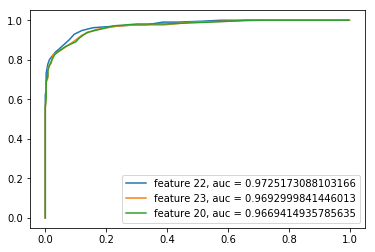

In [6]:
draw_max_auc('datasets/cancer.csv', 0, 'M', 100)

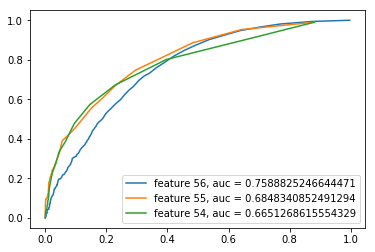

In [7]:
draw_max_auc('datasets/spam.csv', 57, '1', 2000)